In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

$$ \vec{r}(t) = Acos(\omega t) \hat{i} + Asin(\omega t) \hat{j} $$

In [2]:
A = 1
omega = 2*np.pi/10
N = 200

In [3]:
t = np.linspace(0,10,N)
r = np.zeros((N,2))
v = np.zeros((N,2))

In [4]:
def GetPosition():
    r[:,0] = A*np.cos(omega*t)
    r[:,1] = A*np.sin(omega*t)

In [5]:
def GetVelocity():
    v[:,0] = -A*omega*np.sin(omega*t)
    v[:,1] = +A*omega*np.cos(omega*t)

In [6]:
GetPosition()
GetVelocity()

In [7]:
#plt.scatter(r[:,0],r[:,1],color='k',s=100)

<IPython.core.display.Javascript object>


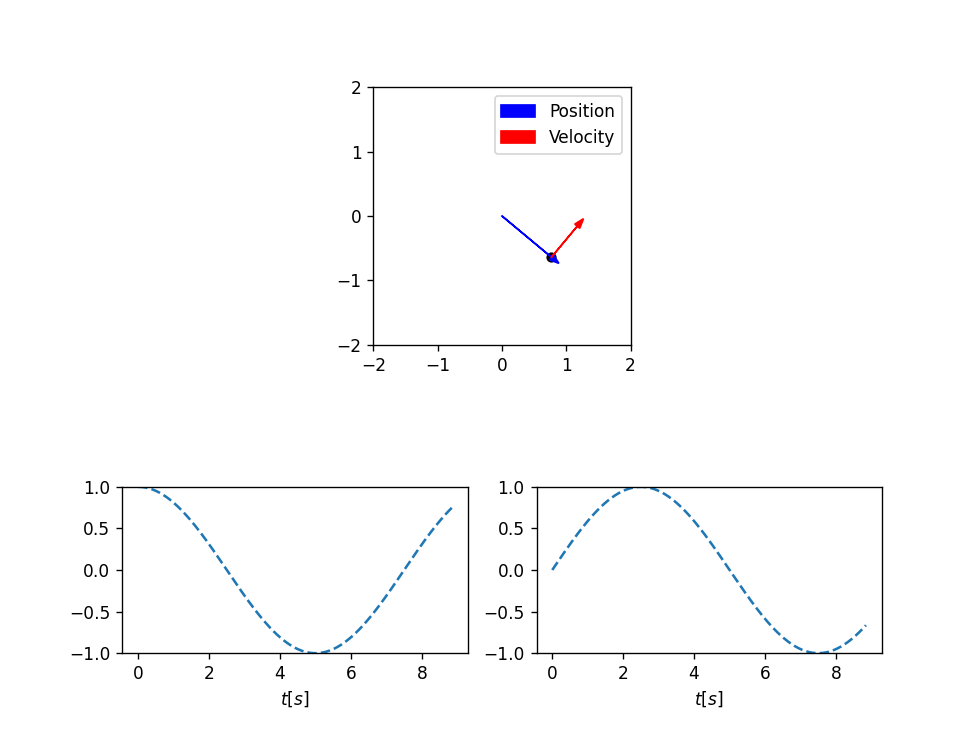

In [15]:
fig = plt.figure( figsize=(8,6) )
ax1 = fig.add_subplot(3,2,5)
ax2 = fig.add_subplot(3,2,6)
ax3 = fig.add_subplot(2,1,1)


def init():
    
    ax1.set_ylim(-A,A)
    ax2.set_ylim(-A,A)
    
    ax1.set_xlabel(r'$t[s]$')
    ax2.set_xlabel(r'$t[s]$')
    
    ax3.set_xlim(-2*A,2*A)
    ax3.set_ylim(-2*A,2*A)
    
    

    ax3.set_aspect('equal')
    
def Update(i):
    
    plot = ax1.clear()
    plot = ax2.clear()
    plot = ax3.clear()
    
    
    init()

    plot = ax1.plot(t[:i],r[:i,0],'--')
    plot = ax2.plot(t[:i],r[:i,1],'--')
    plot = ax3.scatter(r[i,0],r[i,1],color='k',marker='.',s=100)
    plot = ax3.arrow( 0,0,r[i,0],r[i,1],color='b',head_width=0.1,label='Position')
    plot = ax3.arrow( r[i,0],r[i,1],v[i,0],v[i,1],head_width=0.1,color='r',label='Velocity')
    
    plot = ax3.legend(loc=1)
    
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=N,init_func=init)

In [9]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=10, metadata=dict(artist='Alejandro'))
#Animation.save('MCU.mp4', writer=writer_)